In [1]:
### ARIMA Model Forecasting ###
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pmdarima.arima import auto_arima 
import warnings

warnings.filterwarnings('ignore')
plt.style.use('bmh')

yf.pdr_override()
# input
symbol = 'FB'; start = '2020-01-01';end = '2020-12-31'
# Read data 
df = yf.download(symbol,start,end)

[*********************100%***********************]  1 of 1 completed


In [2]:
### Read the sales dataset ###
df_data = df.copy()
# Show dataFrame
df_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,206.750000,209.789993,206.270004,209.779999,209.779999,12077100
2020-01-03,207.210007,210.399994,206.949997,208.669998,208.669998,11188400
2020-01-06,206.699997,212.779999,206.520004,212.600006,212.600006,17058900
2020-01-07,212.820007,214.580002,211.750000,213.059998,213.059998,14912400
2020-01-08,213.000000,216.240005,212.610001,215.220001,215.220001,13475000


In [4]:
## Make sure there are no null values at the end of the dataset
df_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-23,266.890015,272.170013,266.230011,268.109985,268.109985,14329000
2020-12-24,268.880005,270.399994,266.200012,267.399994,267.399994,6702000
2020-12-28,268.739990,277.299988,265.660004,277.000000,277.000000,23299700
2020-12-29,276.950012,280.510010,276.279999,276.779999,276.779999,16383000
2020-12-30,277.950012,278.079987,271.709991,271.869995,271.869995,11803800


In [5]:
## Check the datatypes
df_data.dtypes

# Convert the month column to datetime
df_data.index=pd.to_datetime(df_data.index)

# Recheck the datatypes
df_data.dtypes

# Set the index of the Month 
df_data.set_index(df_data.index,inplace=True)

# Show dataFrame
df_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,206.750000,209.789993,206.270004,209.779999,209.779999,12077100
2020-01-03,207.210007,210.399994,206.949997,208.669998,208.669998,11188400
2020-01-06,206.699997,212.779999,206.520004,212.600006,212.600006,17058900
2020-01-07,212.820007,214.580002,211.750000,213.059998,213.059998,14912400
2020-01-08,213.000000,216.240005,212.610001,215.220001,215.220001,13475000


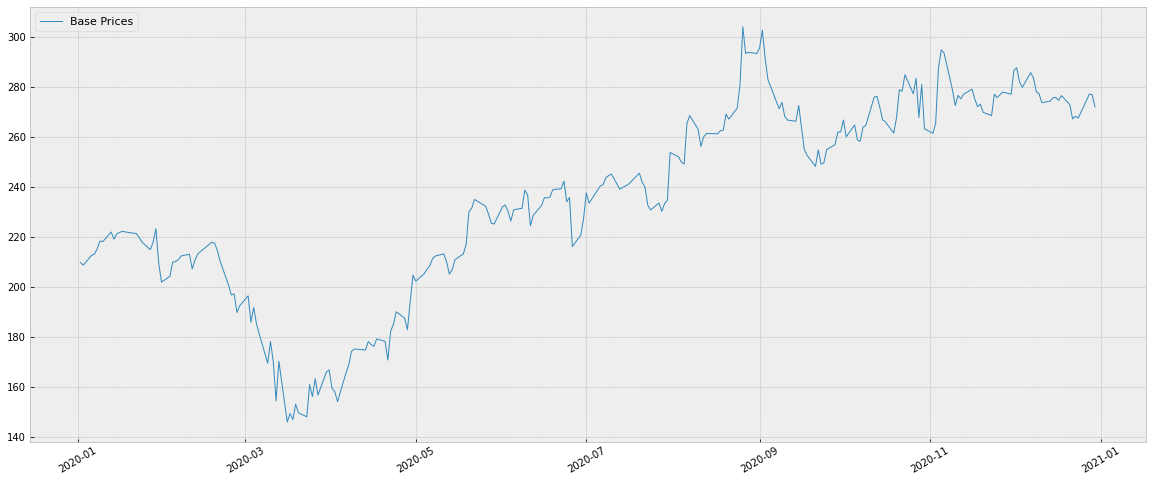

In [6]:
### To understand the pattern ###
plt.figure(figsize=(20,8))

plt.plot(df_data['Adj Close'],lw=1, label='Base Prices')

# Some styling
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Base Chart
plt.show()

In [9]:
### Testing for stationarity (Augmented Dickey Fuller Test) ###
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df_data['Adj Close'])

(0.4812414523580396, True)

In [10]:
### Spliting the dataset into train and test ###
longitud = int(df_data.shape[0]*0.7)
train = df_data[0:longitud].copy()
test = df_data[longitud:].copy()

# Show dataFrame 
train.tail()  

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-04,287.250000,289.000000,271.140015,282.730011,282.730011,30333700
2020-09-08,271.279999,279.299988,269.420013,271.160004,271.160004,24864000
2020-09-09,275.769989,278.480011,271.350006,273.720001,273.720001,22918800
2020-09-10,275.510010,279.160004,267.029999,268.089996,268.089996,24814700
2020-09-11,270.059998,271.390015,262.640015,266.609985,266.609985,18913900


In [11]:
# Show dataFrame 
test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-14,270.950012,276.640015,265.700012,266.149994,266.149994,24093800
2020-09-15,270.670013,274.519989,269.299988,272.420013,272.420013,18478500
2020-09-16,267.290009,272.440002,261.790009,263.519989,263.519989,29183400
2020-09-17,258.279999,261.500000,250.190002,254.820007,254.820007,31281400
2020-09-18,258.399994,259.200012,250.050003,252.529999,252.529999,28130800


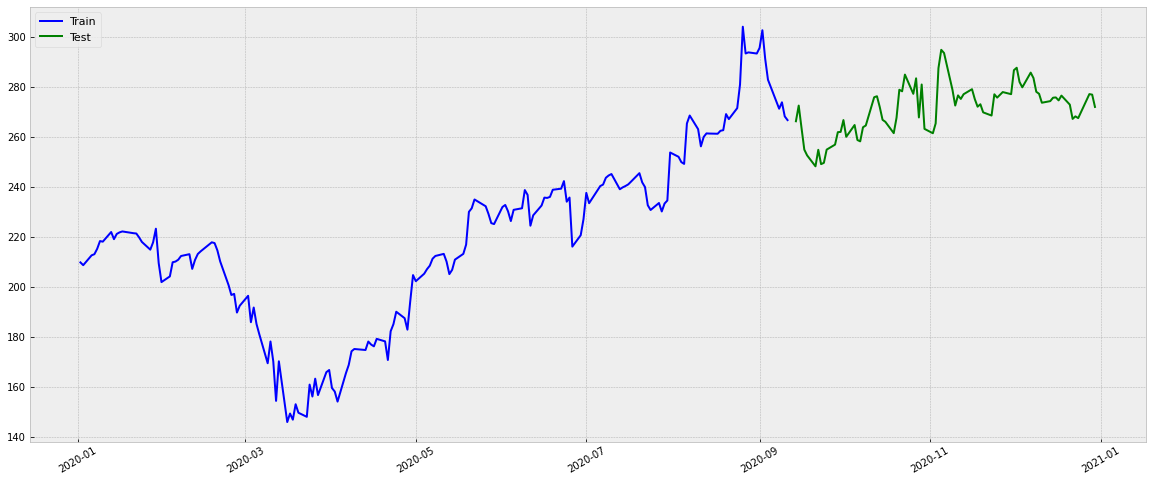

In [12]:
### Show Split Training and Testing datasets ###
plt.figure(figsize=(20,8))

plt.plot(train['Adj Close'],color='blue', label='Train')
plt.plot(test['Adj Close'], color='green', label='Test')

# Some styling
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Base Chart
plt.show()



In [13]:
## Apply Auto arima
arima_model =  auto_arima(train['Adj Close'],start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1161.803, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1147.033, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.53 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1160.442, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1117.233, Time=0.58 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1113.726, Time=1.26 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=1098.907, Time=5.02 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=1093.932, Time=7.04 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=52.50 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=17.54 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=1094.319, Time=7.95 sec
 ARIMA(2,1,0)(5,1,0)[12]             : AIC=1095.592, Time=10.22 sec
 ARIMA(1,1,1)(5,1,0)[12]             : AIC=1095.508, Time=22.40 sec
 ARIMA(0,1,1)(5,1,0)[12]             : AIC=1094.138, Time=11.00 sec
 ARIMA(2,1,1)(5,1,0)[12]     

In [11]:
### Show Summary of the model ###
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  176
Model:             SARIMAX(1, 1, 0)x(5, 1, 0, 12)   Log Likelihood                -539.966
Date:                            Thu, 07 Jan 2021   AIC                           1093.932
Time:                                    19:56:04   BIC                           1115.588
Sample:                                         0   HQIC                          1102.724
                                            - 176                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1221      0.075     -1.634      0.102      -0.269       0.024
ar.S.L12      -0.7506      0.092     -8.185      0.000      -0.930      -0.571
ar.S.L24      -0.8786      0.109     -8.069      0.000      -1.092      -0.665
ar.S.L36      -0.6254      0.117     -5.346      0.000      -0.855      -0.396
ar.S.L48      -0.5614      0.119     -4.720      0.000      -0.795      -0.328
ar.S.L60      -0.2634      0.102     -2.576      0.010      -0.464      -0.063
sigma2        38.8753      4.461      8.715      0.000      30.132      47.618
===================================================================================
Ljung-Box (Q):                       35.60   Jarque-Bera (JB):                11.55
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             0.40
Prob(H) (two-sided):                  0.73   Kurtosis:                         4.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
## Forecast
prediction = pd.DataFrame(arima_model.predict(n_periods = test.shape[0]),index=test.index)
prediction.columns = ['predicted']

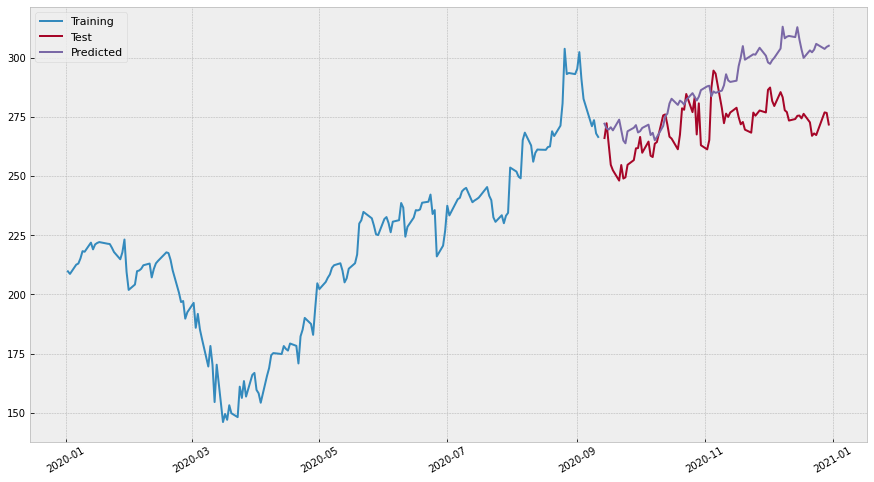

In [13]:
## Plot ARIMA Forecasting
plt.figure(figsize=(20,8))

plt.plot(train['Adj Close'],label="Training")
plt.plot(test['Adj Close'],label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper left')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Base Chart
plt.show()


In [14]:
## Apply Auto arima ###
arima_model =  auto_arima(train['Adj Close'],start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = False,
                          random_state=20,n_fits = 50 )

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1161.803, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1096.044, Time=1.10 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1096.557, Time=4.74 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=1087.105, Time=13.54 sec
 ARIMA(0,1,0)(0,1,4)[12]             : AIC=1089.092, Time=32.91 sec
 ARIMA(0,1,0)(0,1,5)[12]             : AIC=1089.570, Time=81.04 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1147.864, Time=0.19 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1097.297, Time=1.42 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1091.652, Time=6.75 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=1089.080, Time=15.57 sec
 ARIMA(0,1,0)(1,1,4)[12]             : AIC=1090.449, Time=33.25 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1118.441, Time=0.66 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=1090.019, Time=6.75 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=1091.264, Time=10.03 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=1090.028, Tim

 ARIMA(4,1,0)(0,1,1)[12]             : AIC=1098.237, Time=7.03 sec
 ARIMA(4,1,0)(1,1,0)[12]             : AIC=1149.454, Time=1.55 sec
 ARIMA(4,1,1)(0,1,0)[12]             : AIC=1165.123, Time=1.25 sec
 ARIMA(5,1,0)(0,1,0)[12]             : AIC=1164.454, Time=0.67 sec
Total fit time: 1296.766 seconds


In [14]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  176
Model:             SARIMAX(1, 1, 0)x(5, 1, 0, 12)   Log Likelihood                -539.966
Date:                            Sun, 24 Jan 2021   AIC                           1093.932
Time:                                    17:58:10   BIC                           1115.588
Sample:                                         0   HQIC                          1102.724
                                            - 176                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1221      0.075     -1.634      0.102      -0.269       0.024
ar.S.L12      -0.7506      0.092     -8.185      0.000      -0.930      -0.571
ar.S.L24      -0.8786      0.109     -8.069      0.000      -1.092      -0.665
ar.S.L36      -0.6254      0.117     -5.346      0.000      -0.855      -0.396
ar.S.L48      -0.5614      0.119     -4.720      0.000      -0.795      -0.328
ar.S.L60      -0.2634      0.102     -2.576      0.010      -0.464      -0.063
sigma2        38.8753      4.461      8.715      0.000      30.132      47.618
===================================================================================
Ljung-Box (Q):                       35.60   Jarque-Bera (JB):                11.55
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             0.40
Prob(H) (two-sided):                  0.73   Kurtosis:                         4.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

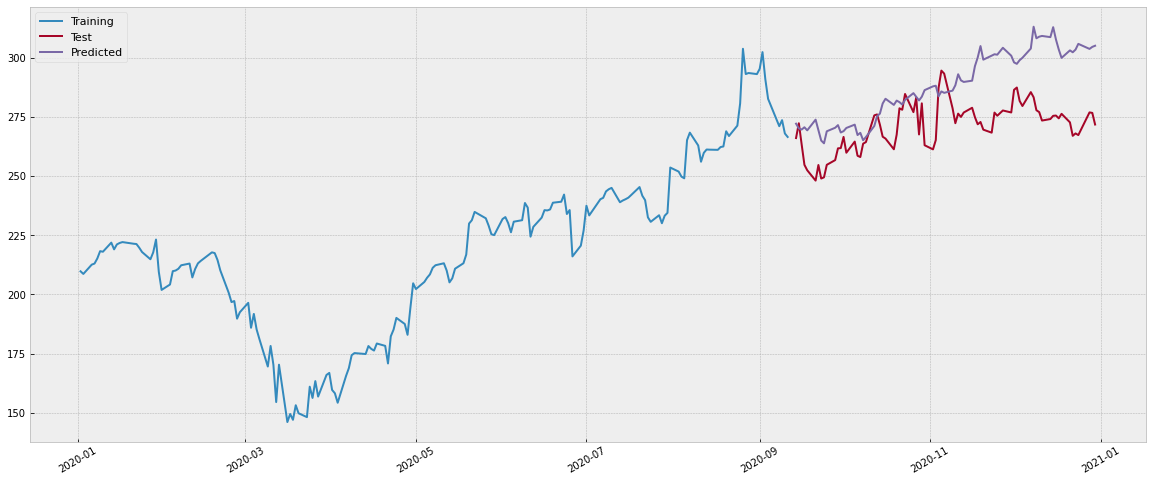

In [15]:
## Forecast
prediction = pd.DataFrame(arima_model.predict(n_periods = test.shape[0]),index=test.index)
prediction.columns = ['predicted']

## Plot ARIMA Forecasting 
plt.figure(figsize=(20,8))

plt.plot(train['Adj Close'],label="Training")
plt.plot(test['Adj Close'],label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper left')
# Some styling
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
# Show Base Chart
plt.show()

In [16]:
## Predicted Value - Error rate
from sklearn.metrics import r2_score
test['predicted'] = prediction
r2_score(test['Adj Close'], test['predicted'])


-3.1690832311215544

In [17]:
## Wrapping all the steps into a function
def ARIMA_Prediccion(symbol, start, end):
    df_n = yf.download(symbol,start,end)
    longitud = int(df_n.shape[0]*0.7)
    train = df_n[0:longitud].copy()
    test = df_n[longitud:].copy()
    # Auto Arima
    arima_model =  auto_arima(train['Adj Close'],start_p=0, d=1, start_q=0, 
                              max_p=5, max_d=5, max_q=5, start_P=0, 
                              D=1, start_Q=0, max_P=5, max_D=5,
                              max_Q=5, m=12, seasonal=True, 
                              error_action='warn',trace = True,
                              supress_warnings=True,stepwise = True,
                              random_state=20,n_fits = 50 )
    # Prediccion
    prediction = pd.DataFrame(arima_model.predict(n_periods = test.shape[0]),index=test.index)
    prediction.columns = ['predicted']

    # Plot ARIMA Forecasting #
    plt.figure(figsize=(20,8))

    plt.plot(train['Adj Close'],label="Training")
    plt.plot(test['Adj Close'],label="Test")
    plt.plot(prediction,label="Predicted")
    plt.legend(loc = 'upper left')
    # Some styling
    plt.legend(loc=2,prop={'size':11})
    plt.grid(True)
    plt.setp(plt.gca().get_xticklabels(), rotation=30)
    # Show Base Chart
    plt.show()

[*********************100%***********************]  1 of 1 completed
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1072.186, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1057.867, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.41 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1070.584, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1015.817, Time=1.17 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1013.371, Time=2.57 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=1000.460, Time=3.49 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=999.430, Time=8.87 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=42.62 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=998.366, Time=11.37 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=inf, Time=15.48 sec
 ARIMA(1,1,0)(4,1,2)[12]             : AIC=999.833, Time=23.51 sec
 ARIMA(1,1,0)(3,1,2)[12]             : AIC=inf, Time=8.91 sec
 ARIMA(1,1,0)(5,1,2)[12]            

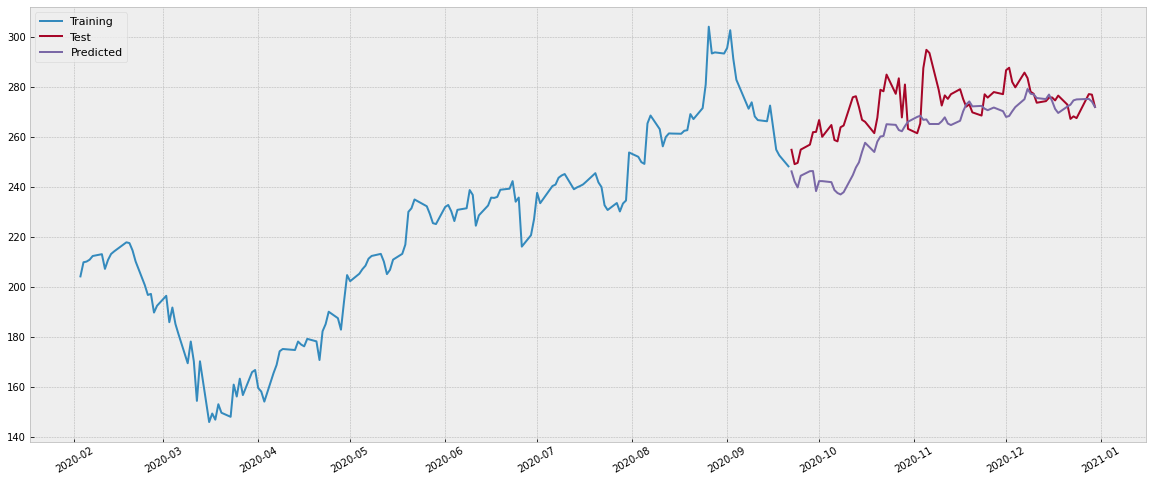

In [22]:
## Implementation - Example 1
ARIMA_Prediccion('FB', '2020-02-01', '2020-12-31')

[*********************100%***********************]  1 of 1 completed
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=754.697, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=748.156, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.98 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=756.692, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=722.312, Time=0.54 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=716.474, Time=1.80 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=708.189, Time=4.78 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=707.937, Time=8.92 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=40.14 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=20.56 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=705.942, Time=4.67 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=706.199, Time=4.67 sec
 ARIMA(0,1,0)(5,1,1)[12]             : AIC=inf, Time=30.71 sec
 ARIMA(0,1,0)(4,1,1)[12]             : AIC=

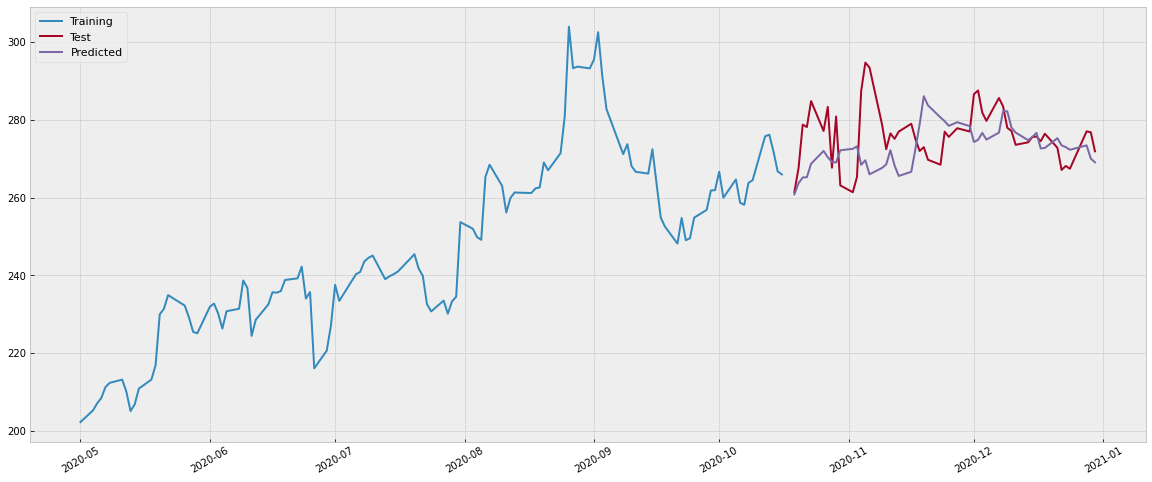

In [21]:
## Implementation - Example 2
ARIMA_Prediccion('FB', '2020-05-01', '2020-12-31')

[*********************100%***********************]  1 of 1 completed
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=583.929, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=574.233, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.28 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=585.900, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=552.632, Time=1.27 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=547.893, Time=2.14 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=546.624, Time=2.90 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=538.874, Time=8.04 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=540.435, Time=19.45 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=24.58 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=537.610, Time=4.70 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=545.605, Time=3.67 sec
 ARIMA(0,1,0)(5,1,1)[12]             : AIC=539.135, Time=24.00 sec
 ARIMA(0,1,0)(4,1,1)[12]           

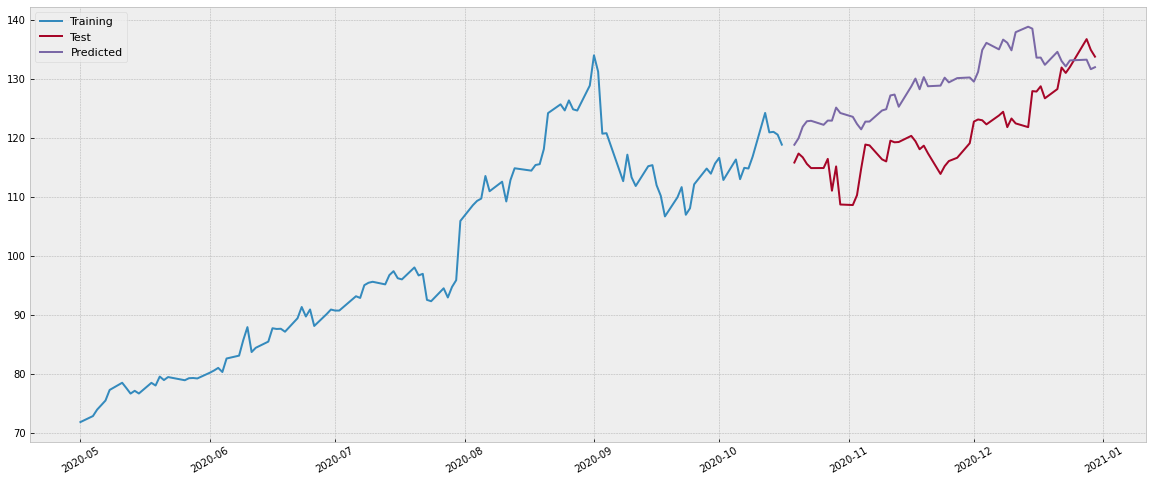

In [20]:
## Implementation - Example 3
ARIMA_Prediccion('AAPL', '2020-05-01', '2020-12-31')